In [15]:
import torch

In [2]:
from sklearn.datasets import fetch_openml
boston=fetch_openml("boston")

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
X,y=boston.data,boston.target

In [5]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_train

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [14]:
X_test

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

In [16]:
X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_train=torch.tensor(y_train.values,dtype=torch.float32).view(-1,1)
y_test=torch.tensor(y_test.values,dtype=torch.float32).view(-1,1)

In [18]:
import torch.nn as nn

In [30]:
class FFNN(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim):
    super(FFNN,self).__init__()
    self.fc1=nn.Linear(input_dim,hidden_dim)
    self.fc2=nn.Linear(hidden_dim,output_dim)
    self.relu=nn.ReLU()


  def forward(self,x):
    out=self.fc1(x)
    out=self.relu(out)
    out=self.fc2(out)
    return out


In [20]:
input_dim=X_train.shape[1]
print(input_dim)
hidden_dim=64
output_dim=1

13


In [26]:
model=FFNN(input_dim,hidden_dim,output_dim)

In [28]:
import torch.optim as optim

In [37]:
optimizer =optim.SGD(model.parameters(), lr=0.01)

In [34]:
criterion = nn.MSELoss()

In [38]:
num_epochs=100
loss_values=[]

for epochs in range(num_epochs):
  model.train()
  optimizer.zero_grad()
  outputs=model(X_train)
  loss=criterion(outputs,y_train)
  loss.backward()
  optimizer.step()
  loss_values.append(loss.item())

  if(epochs+1)%10==0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/100], Loss: 189.6081
Epoch [1/100], Loss: 21.7090
Epoch [1/100], Loss: 21.6714
Epoch [1/100], Loss: 21.6579
Epoch [1/100], Loss: 21.6513
Epoch [1/100], Loss: 21.6478
Epoch [1/100], Loss: 21.6456
Epoch [1/100], Loss: 21.6443
Epoch [1/100], Loss: 21.6434
Epoch [1/100], Loss: 21.6428


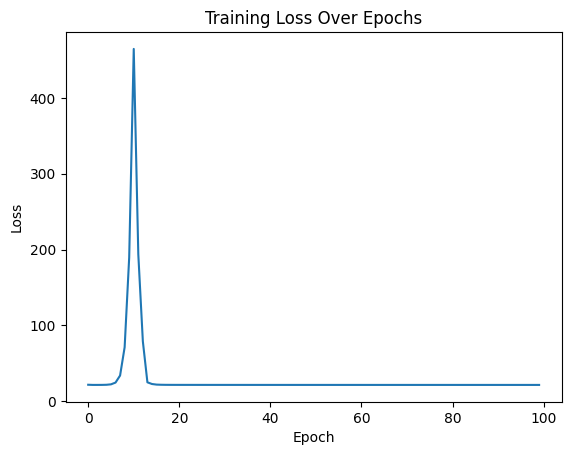

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(num_epochs),loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.show()

In [41]:
X_test.numpy().shape

(102, 13)

In [42]:
y_test.numpy().shape

(102, 1)